<a href="https://colab.research.google.com/github/prachi-ovs/Twitter_Sentiment_Analysis_Using_TF-IDF/blob/main/Twitter_Sentiment_Analysis_Using_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd 
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 

import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Set

In [3]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## **Exploratory Data Analysis**

In [4]:
tweets.shape

(14640, 15)

In [5]:
tweets[['airline_sentiment','text']].isnull().values.any()

False

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Sentiments'),
 Text(0.5, 1.0, 'Airline Sentiments')]

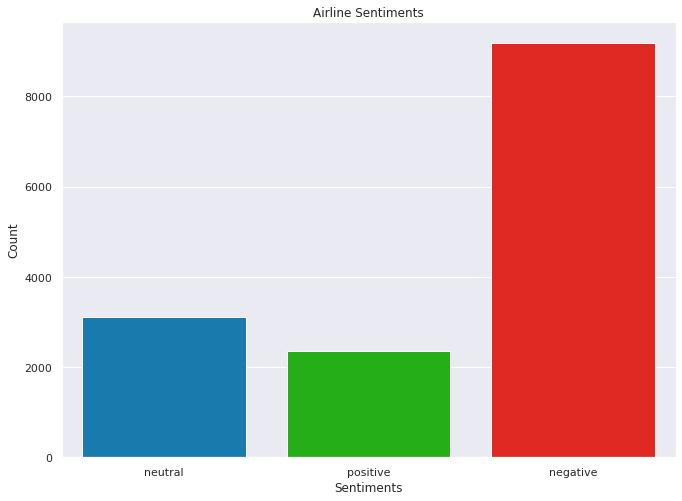

In [6]:
sns.set(rc={'figure.figsize':(11.0,8.0)})
colors = ["#0082c7", "#12c700", "#FF0B04"]


fig = sns.countplot(x ='airline_sentiment', data= tweets, palette=sns.set_palette(sns.color_palette(colors))  )
fig.set(xlabel='Sentiments', ylabel='Count', title ='Airline Sentiments')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Airline'),
 Text(0.5, 1.0, 'Count of Airlines')]

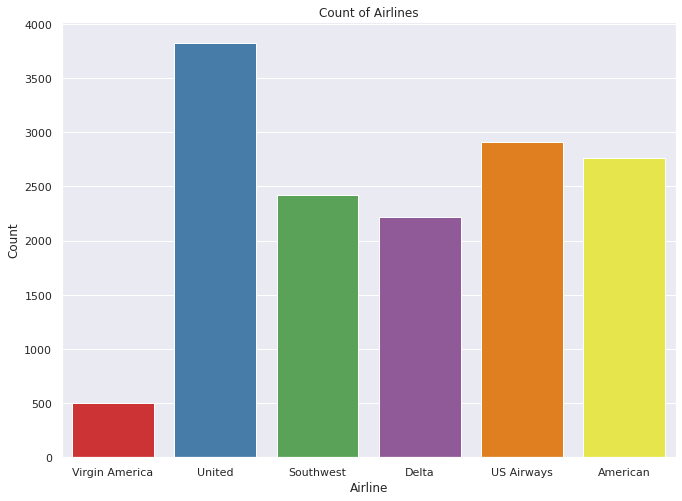

In [7]:
ig_size = sns.set(rc={'figure.figsize':(11.0,8.0)})
fig = sns.countplot(x ='airline', data= tweets, palette="Set1")
fig.set(xlabel='Airline', ylabel='Count', title ='Count of Airlines')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Airline'),
 Text(0.5, 1.0, 'Different sentiments for airlines')]

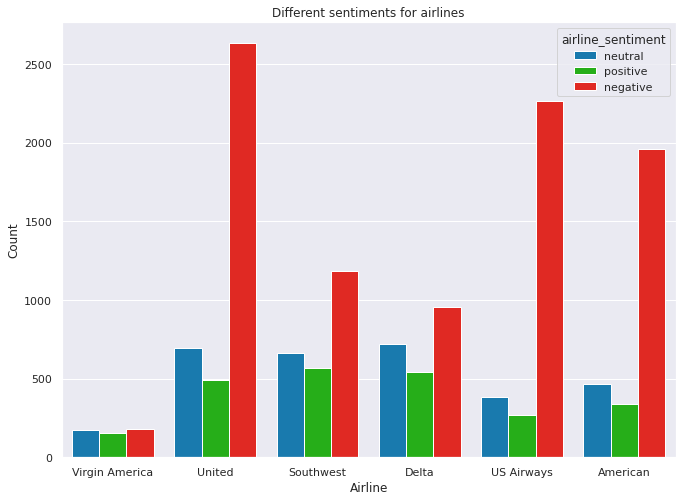

In [8]:
sns.set(rc={'figure.figsize':(11.0,8.0)})
colors = ["#0082c7", "#12c700", "#FF0B04"]
sns.set_palette(sns.color_palette(colors))

fig = sns.countplot(x ='airline', data= tweets, hue='airline_sentiment' )
fig.set(xlabel='Airline', ylabel='Count', title ='Different sentiments for airlines')

## **Data Preprocessing**

In [9]:
x = tweets.loc[:,'text'].values
y = tweets.loc[:,'airline_sentiment'].values

In [26]:
cleaned_tweets = []

for tweet in x:
  cleaned_tweet = re.sub(r'\W', ' ', tweet)  # replace all non alphanumeric characters with space
  cleaned_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned_tweet) # replace single characters in the tweet with space 
  cleaned_tweet = re.sub(r'^b\s+', ' ', cleaned_tweet) # replace the character 'b' from prefix of a tweet which can be present to indicate dataset in byte format
  cleaned_tweet = re.sub(r'\s+', ' ', cleaned_tweet, flags= re.I) #replaces multiple spaces with a single space
  cleaned_tweets.append(cleaned_tweet.lower())




###    `re.sub(r'\W', ' ', tweet))` removes all the special characters from the tweets
###    `re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned_tweet)`  removes all the single characters except the ones at the start of the tweet. This is important because after removing special characters there are many single words that do not have any meaning
###    `re.sub(r'\s+', ' ', cleaned_tweet, flags=re.I)` removes the multiple spaces that are present in the tweets because of removing special characters and single spaces
###    `re.sub(r'^b\s+', '', processed_tweet)` removes that leading “b” which is appended at the beginning of the string when the dataset is in byte format






## **TF-IDF**

### The idea behind TF-IDF is that the words that occur more frequently in one document and less frequently in other documents should be given more importance as they are more useful for classification.


In [32]:
vectorizer = TfidfVectorizer(max_features=2000, stop_words=stopwords.words('english'))  
X = vectorizer.fit_transform(cleaned_tweets).toarray() # to convert the dataset into corresponding TF-IDF feature vectors

print(X.shape)

(14640, 2000)


In [29]:
# vocabulary items
#vectorizer.get_feature_names()

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(11712, 2000) (11712,) (2928, 2000) (2928,)


In [45]:
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
predictions = text_classifier.predict(X_val)

In [56]:
print(confusion_matrix(y_val,predictions))   

[[1722  104   44]
 [ 330  238   46]
 [ 138   59  247]]


In [57]:
print(classification_report(y_val,predictions)) 

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.59      0.39      0.47       614
    positive       0.73      0.56      0.63       444

    accuracy                           0.75      2928
   macro avg       0.70      0.62      0.65      2928
weighted avg       0.74      0.75      0.74      2928



In [54]:
print('The accuracy score of the model is ' +str(round(accuracy_score(y_val, predictions)*100, 2))+ "%")

The accuracy score of the model is 75.38%
